In [320]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
import joblib
from joblib import dump

In [289]:
df_data=pd.read_csv("./data/all_tables_combined.csv")

In [290]:
df_data.head(3)

,household_key,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,...,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2305,873203,1,1.67,414,-1.02,1300,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
1,2305,873203,1,1.79,414,-0.90,1220,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
2,2305,873203,1,1.89,414,0.00,1111,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ


In [291]:
df_s_parent=df_data[df_data['HH_COMP_DESC']=="1 Adult Kids"]

In [292]:
df_s_parent['NUM_DAYS']=df_s_parent['END_DAY'] - df_s_parent['START_DAY'] + 1
df_s_parent.drop(['START_DAY','END_DAY','DAY','COUPON_UPC','HH_COMP_DESC','CAMPAIGN','household_key','PRODUCT_ID'], axis=1, inplace=True)

<ipython-input-292-051c3faac5bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s_parent['NUM_DAYS']=df_s_parent['END_DAY'] - df_s_parent['START_DAY'] + 1
/home/user-1711/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [293]:
df_s_parent.head(2)

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,AGE_DESC,MARITAL_STATUS_CODE,...,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
472,1,1.00,403,-0.50,1142,0.0,0.0,TypeA,25-34,B,...,Homeowner,3,2,69,MEAT-PCKGD,Private,LUNCHMEAT,HAM,6 OZ,56
473,1,5.45,403,-2.19,1142,0.0,0.0,TypeA,25-34,B,...,Homeowner,3,2,2877,MEAT,National,BEEF,CHOICE BEEF,,56


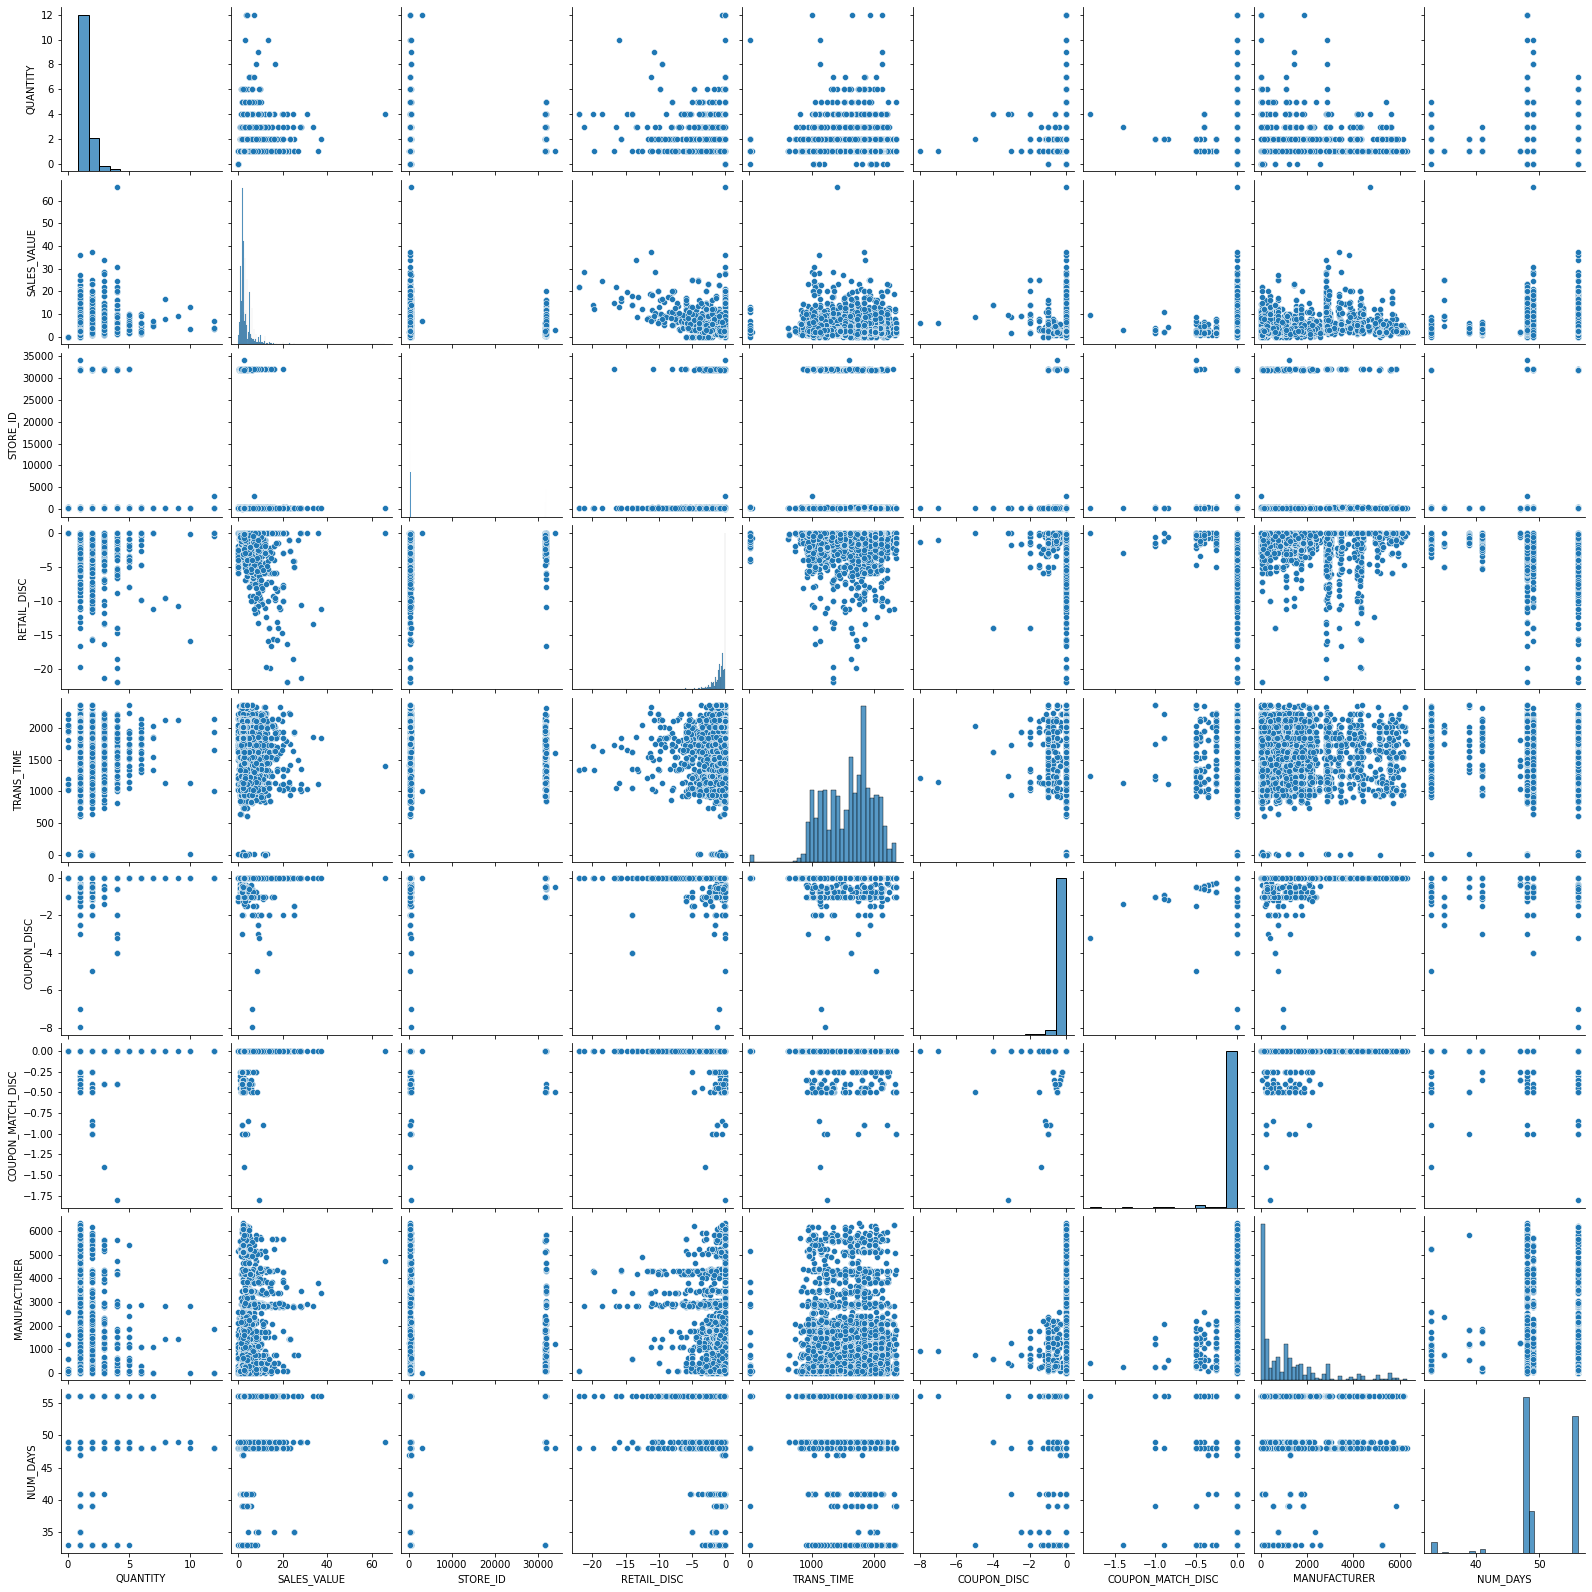

In [294]:
sns.pairplot(df_s_parent)

In [295]:
df_s_parent

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,AGE_DESC,MARITAL_STATUS_CODE,...,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
472,1,1.00,403,-0.50,1142,0.0,0.0,TypeA,25-34,B,...,Homeowner,3,2,69,MEAT-PCKGD,Private,LUNCHMEAT,HAM,6 OZ,56
473,1,5.45,403,-2.19,1142,0.0,0.0,TypeA,25-34,B,...,Homeowner,3,2,2877,MEAT,National,BEEF,CHOICE BEEF,,56
474,2,10.24,403,-4.11,1040,0.0,0.0,TypeA,25-34,B,...,Homeowner,3,2,2877,MEAT,National,BEEF,CHOICE BEEF,,56
475,1,6.42,403,-2.58,1844,0.0,0.0,TypeA,25-34,B,...,Homeowner,3,2,2877,MEAT,National,BEEF,CHOICE BEEF,,56
476,3,11.97,403,0.00,1142,0.0,0.0,TypeA,25-34,B,...,Homeowner,3,2,5154,MEAT,National,BEEF,ANGUS,1 LB,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112013,1,2.99,304,-0.20,1456,0.0,0.0,TypeA,35-44,B,...,Homeowner,4,3+,236,GROCERY,National,FROZEN BREAD/DOUGH,FRZN BISCUITS,20.8 OZ,56
112014,1,2.50,304,-0.19,1456,0.0,0.0,TypeA,35-44,B,...,Homeowner,4,3+,135,GROCERY,National,FRZN POTATOES,FRZN FRENCH FRIES,28 OZ,56
112015,1,2.99,304,-1.00,1456,0.0,0.0,TypeA,35-44,B,...,Homeowner,4,3+,93,MEAT-PCKGD,National,DINNER SAUSAGE,SMOKED/COOKED,16 OZ,48
112016,1,2.50,304,-0.79,1456,0.0,0.0,TypeA,35-44,B,...,Homeowner,4,3+,1598,MEAT-PCKGD,National,FROZEN MEAT,CORN DOGS,9.87 OZ,56


In [296]:
df_s_parent['SUB_COMMODITY_DESC'].value_counts().head(10)

FRZN MULTI SERVE ENTREES ALL      164
FRZN BAGGED VEGETABLES - PLAIN    162
YOGURT NOT MULTI-PACKS            158
PREMIUM                           158
FRZN SS PREMIUM ENTREES/DNRS/T    152
SNACKS/APPETIZERS                 147
FLUID MILK WHITE ONLY             140
DAIRY CASE 100% PURE JUICE - O    132
SOFT DRINKS 12/18&15PK CAN CAR    123
SS ECONOMY ENTREES/DINNERS ALL    122
Name: SUB_COMMODITY_DESC, dtype: int64

In [297]:
df_s_parent[df_s_parent['SUB_COMMODITY_DESC'].str.contains('MILK')]['SUB_COMMODITY_DESC'].unique()

array(['FLUID MILK WHITE ONLY', 'INFANT FORMULA MILK BASE',
       'MISCELLANEOUS MILK', 'CHOCOLATE MILK'], dtype=object)

In [298]:
df_s_parent=df_s_parent[(df_s_parent['SUB_COMMODITY_DESC']=='FLUID MILK WHITE ONLY') | (df_s_parent['SUB_COMMODITY_DESC']=='MISCELLANEOUS MILK') | (df_s_parent['SUB_COMMODITY_DESC']=='CHOCOLATE MILK')]

In [299]:
df_s_parent.columns.values

array(['QUANTITY', 'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'description', 'AGE_DESC',
       'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC', 'MANUFACTURER',
       'DEPARTMENT', 'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC',
       'CURR_SIZE_OF_PRODUCT', 'NUM_DAYS'], dtype=object)

In [300]:
df_s_parent.drop(['STORE_ID','TRANS_TIME','description', 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC', 'DEPARTMENT', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC'], axis=1, inplace=True)

/home/user-1711/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [301]:
df_s_parent

,QUANTITY,SALES_VALUE,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,BRAND,CURR_SIZE_OF_PRODUCT,NUM_DAYS
3440,1,2.49,0.00,0.0,0.0,69,Private,1 GA,48
3441,1,1.67,-0.82,0.0,0.0,69,Private,1 GA,48
3442,2,4.98,0.00,0.0,0.0,69,Private,1 GA,48
3443,1,2.49,0.00,0.0,0.0,69,Private,1 GA,48
3444,1,1.67,-0.82,0.0,0.0,69,Private,1 GA,48
...,...,...,...,...,...,...,...,...,...
98393,1,1.00,-0.79,0.0,0.0,69,Private,,48
98394,2,3.88,0.00,0.0,0.0,69,Private,,48
107281,1,1.89,0.00,0.0,0.0,709,National,16 OZ,49
108984,1,2.79,0.00,0.0,0.0,69,Private,1 GA,49


In [302]:
df_s_parent['CURR_SIZE_OF_PRODUCT'].value_counts()

         86
1 GA     60
1 PT     20
16 OZ     6
1 QT      2
PT        1
Name: CURR_SIZE_OF_PRODUCT, dtype: int64

In [303]:
def label_to_volume(label):
    volume=int()
    if label=='1 GA':
        volume=128
    elif label=='1 PT':
        volume=16
    elif label=='16 OZ':
        volume=16
    elif label=='1 QT':
        volume=32
    elif label=='PT':
        volume=16
        
    return volume

vect_label_to_volume=np.vectorize(label_to_volume)

In [304]:
df_s_parent['VOLUME']=vect_label_to_volume(df_s_parent['CURR_SIZE_OF_PRODUCT'])
df_s_parent.head()

<ipython-input-304-8d7fce3a0822>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s_parent['VOLUME']=vect_label_to_volume(df_s_parent['CURR_SIZE_OF_PRODUCT'])


,QUANTITY,SALES_VALUE,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,BRAND,CURR_SIZE_OF_PRODUCT,NUM_DAYS,VOLUME
3440,1,2.49,0.00,0.0,0.0,69,Private,1 GA,48,128
3441,1,1.67,-0.82,0.0,0.0,69,Private,1 GA,48,128
3442,2,4.98,0.00,0.0,0.0,69,Private,1 GA,48,128
3443,1,2.49,0.00,0.0,0.0,69,Private,1 GA,48,128
3444,1,1.67,-0.82,0.0,0.0,69,Private,1 GA,48,128


In [305]:
sales=df_s_parent['SALES_VALUE']

In [306]:
df_s_parent_features=df_s_parent.drop('SALES_VALUE', axis=1)

In [307]:
dummy=pd.get_dummies(df_s_parent_features['BRAND'])
df_s_parent_features=pd.concat([df_s_parent_features,dummy], axis=1)
df_s_parent_features

,QUANTITY,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,BRAND,CURR_SIZE_OF_PRODUCT,NUM_DAYS,VOLUME,National,Private
3440,1,0.00,0.0,0.0,69,Private,1 GA,48,128,0,1
3441,1,-0.82,0.0,0.0,69,Private,1 GA,48,128,0,1
3442,2,0.00,0.0,0.0,69,Private,1 GA,48,128,0,1
3443,1,0.00,0.0,0.0,69,Private,1 GA,48,128,0,1
3444,1,-0.82,0.0,0.0,69,Private,1 GA,48,128,0,1
...,...,...,...,...,...,...,...,...,...,...,...
98393,1,-0.79,0.0,0.0,69,Private,,48,0,0,1
98394,2,0.00,0.0,0.0,69,Private,,48,0,0,1
107281,1,0.00,0.0,0.0,709,National,16 OZ,49,16,1,0
108984,1,0.00,0.0,0.0,69,Private,1 GA,49,128,0,1


In [308]:
df_s_parent_features.drop(['BRAND','CURR_SIZE_OF_PRODUCT'], axis=1, inplace=True)

<AxesSubplot:>

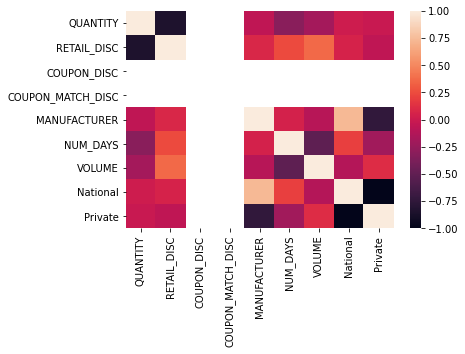

In [309]:
sns.heatmap(df_s_parent_features.corr())

In [310]:
X=df_s_parent_features
y=sales

In [311]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state = 22)

In [312]:
sscaler=StandardScaler()

In [313]:
X_train_scaled=sscaler.fit_transform(X_train)
X_test_scaled=sscaler.transform(X_test)

In [314]:
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train_scaled,y_train)

Lasso(alpha=0.0001)

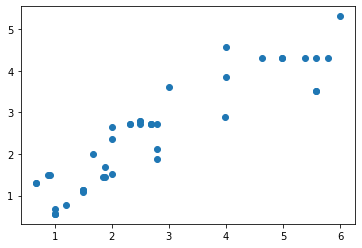

In [315]:
y_preds=lasso.predict(X_test_scaled)
plt.scatter(y_test,y_preds)

In [316]:
pd.DataFrame({'features':X.columns, 'coefs':lasso.coef_}).sort_values(by='coefs', ascending=False)

,features,coefs
0,QUANTITY,1.519231
1,RETAIL_DISC,0.897966
6,VOLUME,0.204519
7,National,0.045366
2,COUPON_DISC,0.000000
3,COUPON_MATCH_DISC,0.000000
8,Private,-0.000000
4,MANUFACTURER,-0.029958
5,NUM_DAYS,-0.411510


In [329]:
cross_val_score(lasso, X_train_scaled,y_train)

array([0.79785837, 0.866427  , 0.80647737, 0.8735066 , 0.60973561])

In [330]:
cross_val_score(lasso, X_test_scaled,y_test)

array([0.70124705, 0.86640583, 0.82661028, 0.66966709, 0.83007296])

Next let's take the columns whose coefficients have a magnitude over 0.01. We'll try to estimate using ridge instead of lasso and see hot it performs.

NB: REMOVE THE UNECESSARY COLUMNS FROM THE FEATURE MATRIX. NOT DONE YET.

In [328]:
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)

Ridge()

In [331]:
y_ridge_preds=ridge.predict(X_test_scaled)

In [333]:
cross_val_score(ridge, X_test_scaled,y_test)

array([0.72576678, 0.85006201, 0.80306079, 0.62838151, 0.81694092])

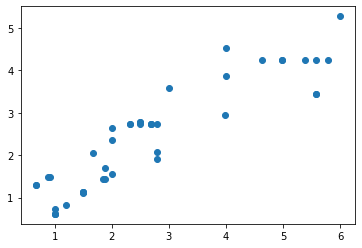

In [332]:
plt.scatter(y_test,y_ridge_preds)

In [319]:
dump(lasso, 'spf_model.joblib')

['spf_model.joblib']